In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

data1 = pd.read_csv("./datasets/all_cust_with_date.csv", sep=";", dtype={"cust_id":"object"})

In [376]:
df = data1.copy()

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405037 entries, 0 to 405036
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   q_date                     405037 non-null  object 
 1   cust_id                    405037 non-null  object 
 2   cust_date                  405037 non-null  object 
 3   consumer_loan_balance      405037 non-null  float64
 4   vehicle_loan_balance       405037 non-null  float64
 5   mortgage_balance           405037 non-null  float64
 6   overdraft_balance          405037 non-null  float64
 7   overdraft_avg              405037 non-null  float64
 8   savings_balance            405037 non-null  float64
 9   drawing_balance            405037 non-null  float64
 10  savings_avg                405037 non-null  float64
 11  drawing_avg                405037 non-null  float64
 12  salary_avg                 405037 non-null  float64
 13  has_salary                 40

In [293]:
df["cust_date"] = pd.to_datetime(df["cust_date"])

In [294]:
df["cust_years"] = df["cust_date"].apply(lambda x: 2020 - x.year)

In [295]:
df.insert(3, "cust_year", df["cust_years"])

In [296]:
df.insert(18, "has_salary_account", df["has_salary"])

In [297]:
df.insert(19, "has_default_record", df["has_nonperforming_loan"])

In [298]:
df = df.drop(["has_nonperforming_loan",
              "has_salary", "cust_years",
              "q_date",
              "cust_date",
              "number_of_products",
              "number_of_active_products"], axis=1)

In [299]:
df_v1 = df.iloc[:, [0,1,2,3,4,5,7,8,6,9,10,11,12,13,14,15,16,25,29,47,49,17,19,21,23,28,31,33,35,37,39,41,43,45,51,24,26,46,48,18,20,22,27,30,32,34,36,38,40,42,44,50]]
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405037 entries, 0 to 405036
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cust_id                405037 non-null  object 
 1   cust_year              405037 non-null  int64  
 2   consumer_loan_balance  405037 non-null  float64
 3   vehicle_loan_balance   405037 non-null  float64
 4   mortgage_balance       405037 non-null  float64
 5   overdraft_balance      405037 non-null  float64
 6   savings_balance        405037 non-null  float64
 7   drawing_balance        405037 non-null  float64
 8   overdraft_avg          405037 non-null  float64
 9   savings_avg            405037 non-null  float64
 10  drawing_avg            405037 non-null  float64
 11  salary_avg             405037 non-null  float64
 12  card_limit             405037 non-null  float64
 13  has_salary_account     405037 non-null  int64  
 14  has_default_record     405037 non-nu

In [300]:
df_v1["num_owned_product"] = 0 
df_v1["num_active_product"] = 0

In [301]:
for i in range(16,35):
    df_v1.loc[(df_v1.iloc[:,i] > 0), "num_owned_product"] = df_v1["num_owned_product"] + 1
    
for i in range(35,52):
    df_v1.loc[(df_v1.iloc[:,i] > 0), "num_active_product"] = df_v1["num_active_product"] + 1

credit_products = (df_v1["consumer_loan_balance"] +
                   df_v1["vehicle_loan_balance"] + 
                   df_v1["mortgage_balance"] + 
                   df_v1["overdraft_balance"])*0.7 + (df_v1["card_limit"])*0.1
debit_products = (df_v1["savings_balance"] +
                  df_v1["drawing_balance"])*0.2 + (df_v1["has_salary_account"])*10
morality_penalty = ((df_v1["has_deferred_payment"])*100) + ((df_v1["has_default_record"])*1000)
df_v1["cust_value_score"] = credit_products + debit_products - morality_penalty

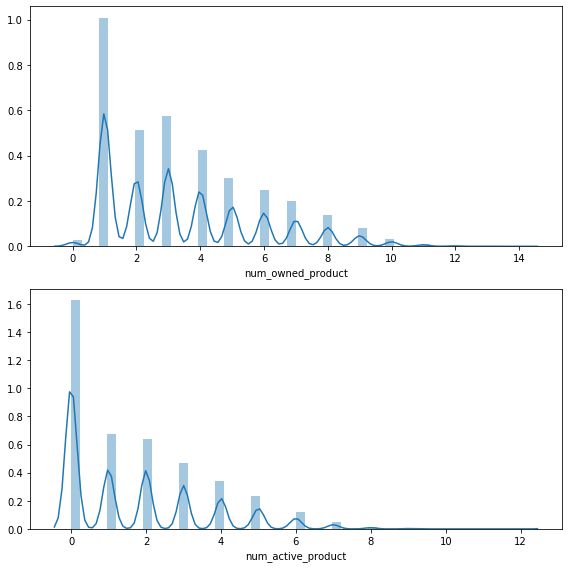

In [302]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
sns.distplot(df_v1["num_owned_product"], ax=ax1)
sns.distplot(df_v1["num_active_product"], ax=ax2)
plt.tight_layout()

In [303]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405037 entries, 0 to 405036
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cust_id                405037 non-null  object 
 1   cust_year              405037 non-null  int64  
 2   consumer_loan_balance  405037 non-null  float64
 3   vehicle_loan_balance   405037 non-null  float64
 4   mortgage_balance       405037 non-null  float64
 5   overdraft_balance      405037 non-null  float64
 6   savings_balance        405037 non-null  float64
 7   drawing_balance        405037 non-null  float64
 8   overdraft_avg          405037 non-null  float64
 9   savings_avg            405037 non-null  float64
 10  drawing_avg            405037 non-null  float64
 11  salary_avg             405037 non-null  float64
 12  card_limit             405037 non-null  float64
 13  has_salary_account     405037 non-null  int64  
 14  has_default_record     405037 non-nu

In [304]:
#df_v1.to_csv("all_cust_with_date_v1.csv", sep=";", index=False)

In [305]:
data2 = pd.read_csv("./datasets/consumer_loan_usage.csv", sep=";", dtype={"cust_id":"object", "loan_id":"object"}) #Cust_ID

In [306]:
df_target = data2.copy()
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268739 entries, 0 to 268738
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   cust_id  268739 non-null  object 
 1   date     268739 non-null  object 
 2   loan_id  268739 non-null  object 
 3   amount   268739 non-null  float64
dtypes: float64(1), object(3)
memory usage: 8.2+ MB


In [13]:
#df_target = df_target.drop_duplicates("Cust_ID")

In [307]:
#df_target["product_1_purchase"] = 1
df_target["consumer_loan_purchase"] = 1
#df_target = df_target.rename(columns={"Cust_ID": "cust_id"})
#df_target = df_target[["cust_id", "product_1_purchase"]]
df_target = df_target[["cust_id", "consumer_loan_purchase"]]
df_v1 = df_v1.merge(df_target, how="left", on="cust_id")

In [309]:
#df["product_1_purchase"] = df["product_1_purchase"].fillna(0)
df_v1["consumer_loan_purchase"] = df_v1["consumer_loan_purchase"].fillna(0)
#df["product_1_purchase"] = df["product_1_purchase"].astype("int64")
df_v1["consumer_loan_purchase"] = df_v1["consumer_loan_purchase"].astype("int64")

In [310]:
#df.loc[df["has_product_1"] == 0,"product_1_purchase"].value_counts() / df.loc[df["has_product_1"] == 0,"product_1_purchase"].count()
df_v1["consumer_loan_purchase"].value_counts() / df_v1["consumer_loan_purchase"].count()

0    0.972603
1    0.027397
Name: consumer_loan_purchase, dtype: float64

**Segmentation using cust_year, customer_premium and number_of_active**

**cust_year:** years of being customer of bank

**customer_premium:** an estimation which converges the customer valuation based mainly on credit and deposit balances, and is calculated as: 

                     (consumer_loan_balance + vehicle_loan_balance + mortgage_balance + overdraft_balance)*0.8 + 
                     (savings_balance + drawing_balance)*0.2 +
                     (card_limit)*0.1 + 
                     (has_salary_account)*100 -
                     (has_deferred_payment)*100 -
                     (has_deferred_payment)*1000
      
**number_of_active:** instead owning a particular product once, it represents product usage reached a certain criteria

source: [https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis]

source: [https://www.kaggle.com/fabiendaniel/customer-segmentation/data]

source: [https://www.kaggle.com/paulinan/bank-customer-segmentation]

In [313]:
process_array = df_v1[["cust_year", "num_active_product"]].values
sc = StandardScaler()
process_matrix = sc.fit_transform(process_array)

In [314]:
inertia = []
for n in range(1, 11):
    km = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    km.fit(process_matrix)
    inertia.append(km.inertia_)

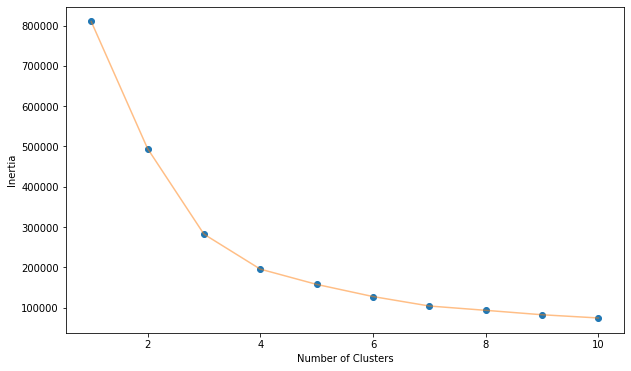

In [315]:
plt.figure(1, figsize=(10 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Clusters"), plt.ylabel("Inertia")
plt.show()

In [316]:
km = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
km.fit(process_matrix)
labels = km.labels_
centroids = km.cluster_centers_

In [317]:
df_v1["target_segment"] = labels

In [319]:
for s in range(len(df_v1["target_segment"].value_counts())):
    #print("target_segment:", s, "\n", df.loc[((df["target_segment"] == s) & (df["has_product_1"] == 0)), "product_1_purchase"].value_counts())
    print("target_segment:", s, "\n", df_v1.loc[(df_v1["target_segment"] == s), "consumer_loan_purchase"].value_counts())

target_segment: 0 
 0    134435
1       281
Name: consumer_loan_purchase, dtype: int64
target_segment: 1 
 0    51337
1     5389
Name: consumer_loan_purchase, dtype: int64
target_segment: 2 
 0    100509
1      4835
Name: consumer_loan_purchase, dtype: int64
target_segment: 3 
 0    107659
1       592
Name: consumer_loan_purchase, dtype: int64


In [330]:
grouped_af = df_v1.groupby(['target_segment']).mean().round(2)
grouped_af.iloc[:,50:55]

,active_product_14,num_owned_product,num_active_product,consumer_loan_purchase
target_segment,,,,
0,0.00,1.84,0.30,0.00
1,0.13,6.85,4.64,0.10
2,0.03,4.85,3.05,0.05
3,0.01,2.19,0.59,0.01


In [333]:
process_array = df.iloc[:,35:51].values
sc = StandardScaler()
process_matrix = sc.fit_transform(process_array)

In [365]:
inertia = []
for n in range(1, 15):
    km = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    km.fit(process_matrix)
    inertia.append(km.inertia_)

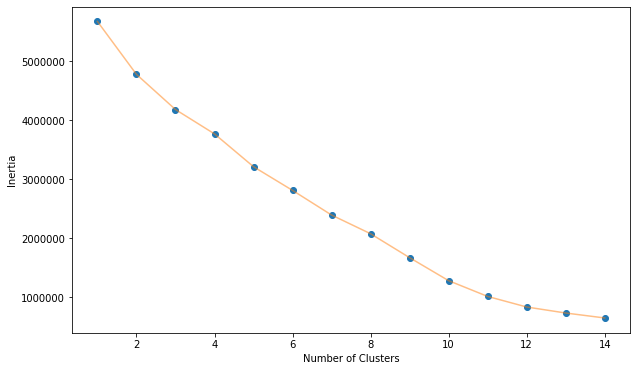

In [374]:
plt.figure(1, figsize=(10, 6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Clusters"), plt.ylabel("Inertia")
plt.show()

In [370]:
km = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
km.fit(process_matrix)
labels = km.labels_
centroids = km.cluster_centers_

In [371]:
df_v1["target_segment"] = labels

In [372]:
for s in range(len(df_v1["target_segment"].value_counts())):
    #print("target_segment:", s, "\n", df.loc[((df["target_segment"] == s) & (df["has_product_1"] == 0)), "product_1_purchase"].value_counts())
    print("target_segment:", s, "\n", df_v1.loc[(df_v1["target_segment"] == s), "consumer_loan_purchase"].value_counts())

target_segment: 0 
 0    267580
1      3788
Name: consumer_loan_purchase, dtype: int64
target_segment: 1 
 0    16917
1     2869
Name: consumer_loan_purchase, dtype: int64
target_segment: 2 
 0    19355
1      463
Name: consumer_loan_purchase, dtype: int64
target_segment: 3 
 0    47440
1       78
Name: consumer_loan_purchase, dtype: int64
target_segment: 4 
 0    42648
1     3899
Name: consumer_loan_purchase, dtype: int64


In [373]:
grouped_af = df_v1.groupby(['target_segment']).mean().round(2)
grouped_af.iloc[:,50:55]

,active_product_14,num_owned_product,num_active_product,consumer_loan_purchase
target_segment,,,,
0,0.02,2.83,1.13,0.01
1,0.05,7.40,4.68,0.15
2,0.09,4.74,3.19,0.02
3,0.00,1.53,0.55,0.00
4,0.09,6.55,4.29,0.08
